In [1]:
from helper_functions import *
PLOT_PATH_20newsgroup = os.path.abspath(os.path.join(PLOT_PATH, "low_dimensional_manifolds"))
datasetPath = os.path.abspath(os.path.join(datasetPath, "scRNA_dataset-1_CRCC_AKPE_scRNASeq_2024/"))
datasetName = "scRNA_dataset-1_CRCC_AKPE_scRNASeq_2024"

In [2]:
import pandas as pd
import numpy as np

In [3]:
def load_data(filename):
    try:
        loaded_df_with_index = pd.read_csv(os.path.abspath(os.path.join(datasetPath, filename + ".csv")) , index_col=0)
        loaded_matrix = loaded_df_with_index.values
        loaded_index = loaded_df_with_index.index
        print("Successfully loaded '" + filename + "'.csv' with row names as index.")
        print("Shape of loaded matrix:", loaded_matrix.shape)
        print("First 5 rows of the index:", loaded_index[:5].tolist())
        print("First 5 columns of the matrix:\n", loaded_matrix[:5, :5])
        return loaded_matrix, loaded_index
    except FileNotFoundError:
        print("Error: '" + filename + "' not found.")


In [4]:
pca_data, data_index = load_data("sct_pca_embeddings")

Successfully loaded 'sct_pca_embeddings'.csv' with row names as index.
Shape of loaded matrix: (11505, 50)
First 5 rows of the index: ['sample1_AAACCCATCGATCCAA-1', 'sample1_AAACCCATCGGTCTAA-1', 'sample1_AAACCCATCTTTCCGG-1', 'sample1_AAACGAAAGCGACTGA-1', 'sample1_AAACGAAAGTAAACTG-1']
First 5 columns of the matrix:
 [[ 28.77201431  -4.9061265    9.19699071   4.38563945  12.59065004]
 [ 28.65983222 -12.82542439  -2.17624735  20.34897321  -4.65590979]
 [ 55.84140878  13.652834   -16.46518717   3.57643492  -2.65998527]
 [ 32.25849933  13.51903017  -8.81719705  12.71265535 -12.52686845]
 [ 31.11154598   5.42460221 -10.03139599  10.69345789   1.97892845]]


In [5]:
cluster_labels, _ = load_data("sct_cluster_labels")
cluster_labels = cluster_labels.flatten()
cluster_labels

Successfully loaded 'sct_cluster_labels'.csv' with row names as index.
Shape of loaded matrix: (11505, 1)
First 5 rows of the index: ['sample1_AAACCCATCGATCCAA-1', 'sample1_AAACCCATCGGTCTAA-1', 'sample1_AAACCCATCTTTCCGG-1', 'sample1_AAACGAAAGCGACTGA-1', 'sample1_AAACGAAAGTAAACTG-1']
First 5 columns of the matrix:
 [[2]
 [2]
 [2]
 [2]
 [3]]


array([2, 2, 2, ..., 5, 0, 4], shape=(11505,))

In [7]:
smoc2_counts, _ = load_data("smoc2_counts")
smoc2_counts = smoc2_counts.flatten()
smoc2_counts

Successfully loaded 'smoc2_counts'.csv' with row names as index.
Shape of loaded matrix: (11505, 1)
First 5 rows of the index: [1, 2, 3, 4, 5]
First 5 columns of the matrix:
 [[0]
 [2]
 [0]
 [3]
 [1]]


array([0, 2, 0, ..., 0, 6, 3], shape=(11505,))

In [8]:
smoc2_data, _ = load_data("smoc2_data")
smoc2_data = smoc2_data.flatten()
smoc2_data

Successfully loaded 'smoc2_data'.csv' with row names as index.
Shape of loaded matrix: (11505, 1)
First 5 rows of the index: [1, 2, 3, 4, 5]
First 5 columns of the matrix:
 [[0.        ]
 [1.09861229]
 [0.        ]
 [1.38629436]
 [0.69314718]]


array([0.        , 1.09861229, 0.        , ..., 0.        , 1.94591015,
       1.38629436], shape=(11505,))

In [81]:
from cluster_algos import linkage_cluster
kwargs = {'cluster_algo_kwargs': {'clusternumber' : 8}}

In [82]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = run_isumap_cluster(pca_data, cluster_labels, datasetName=datasetName+"_8", cluster_algo=linkage_cluster, **kwargs)

Number of CPU threads =  128

Nearest neighbours computed in: 0.71 sec

Normalization computed in: 0.02 sec
Computing the graph...

Graph computation: 1.24 sec
Applying t-conorm...

T-conorm application: 8.76 sec

Running Dijkstra...

Dijkstra: 27.48 sec
Number of clusters:  8

Performing classical MDS...

classical MDS: 5.28 sec

Starting cluster separation optimization...
Optimizing separation for 8 clusters...
Total parameters: 24
Iteration 0, Loss: 81.255615
Iteration 10, Loss: 0.894930
Iteration 20, Loss: 0.028782
Iteration 30, Loss: 0.011069
Iteration 40, Loss: 0.006809
Iteration 50, Loss: 0.004107
Iteration 60, Loss: 0.002831
Iteration 70, Loss: 0.002124
Converged at iteration 76

Isumap total time: 114.05 sec


In [88]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = load_my_object("scRNA_dataset-1_AKPE_scRNASeq_2024_8")

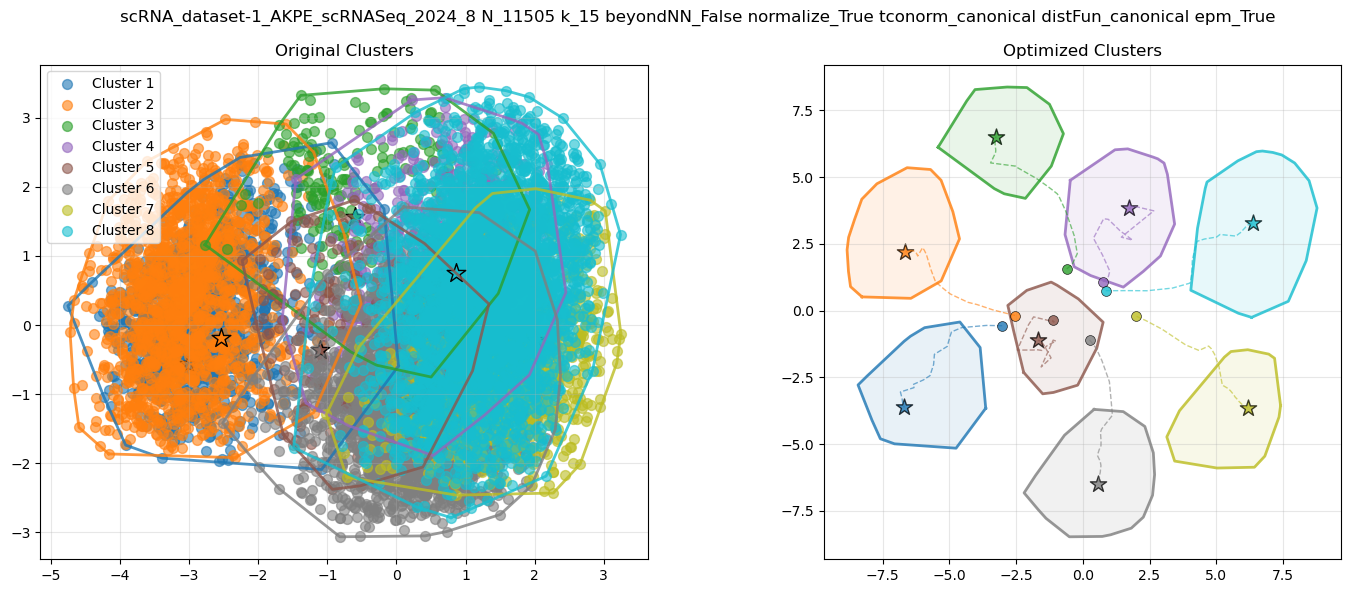

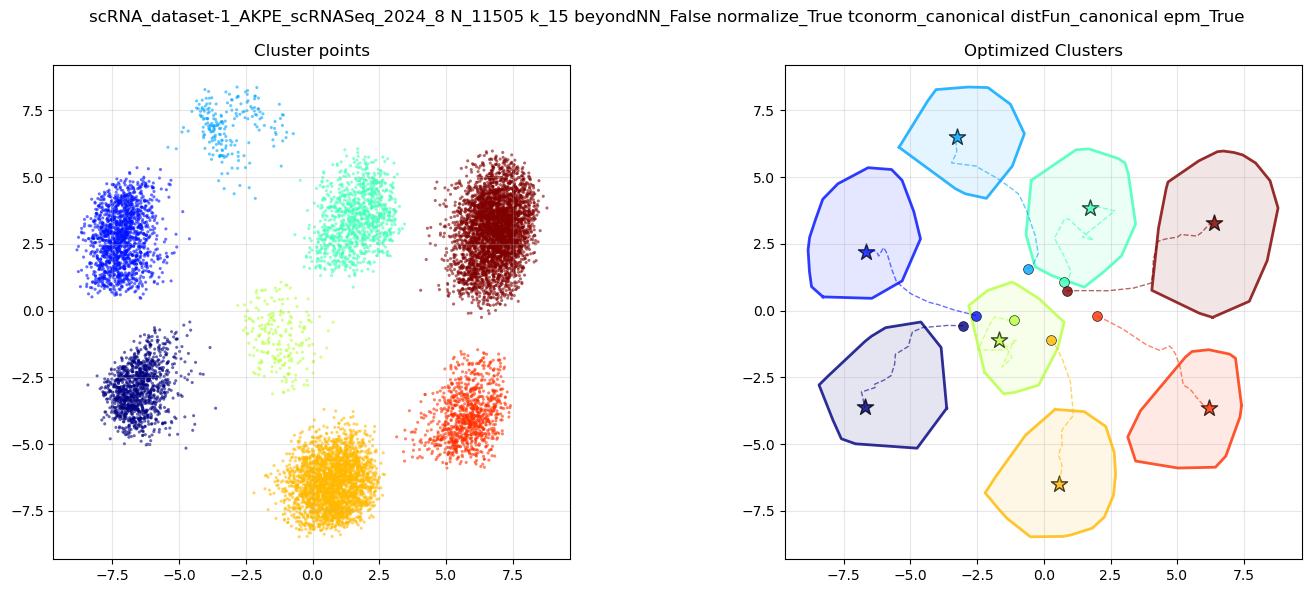

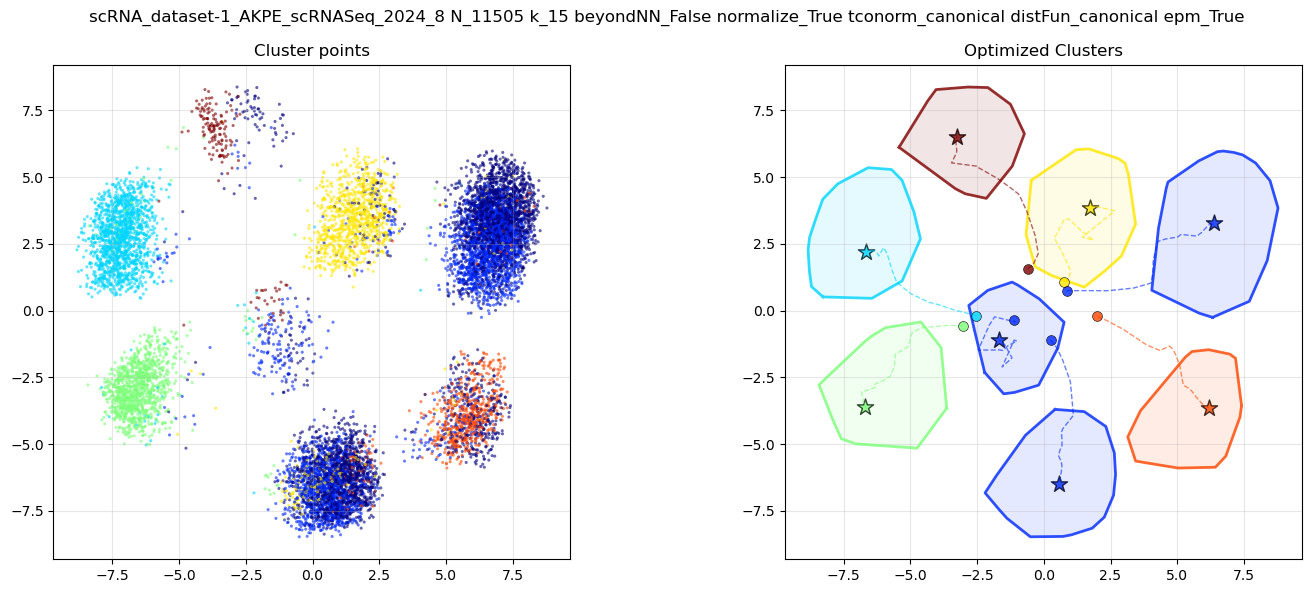

In [89]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters, enable_grid=True)

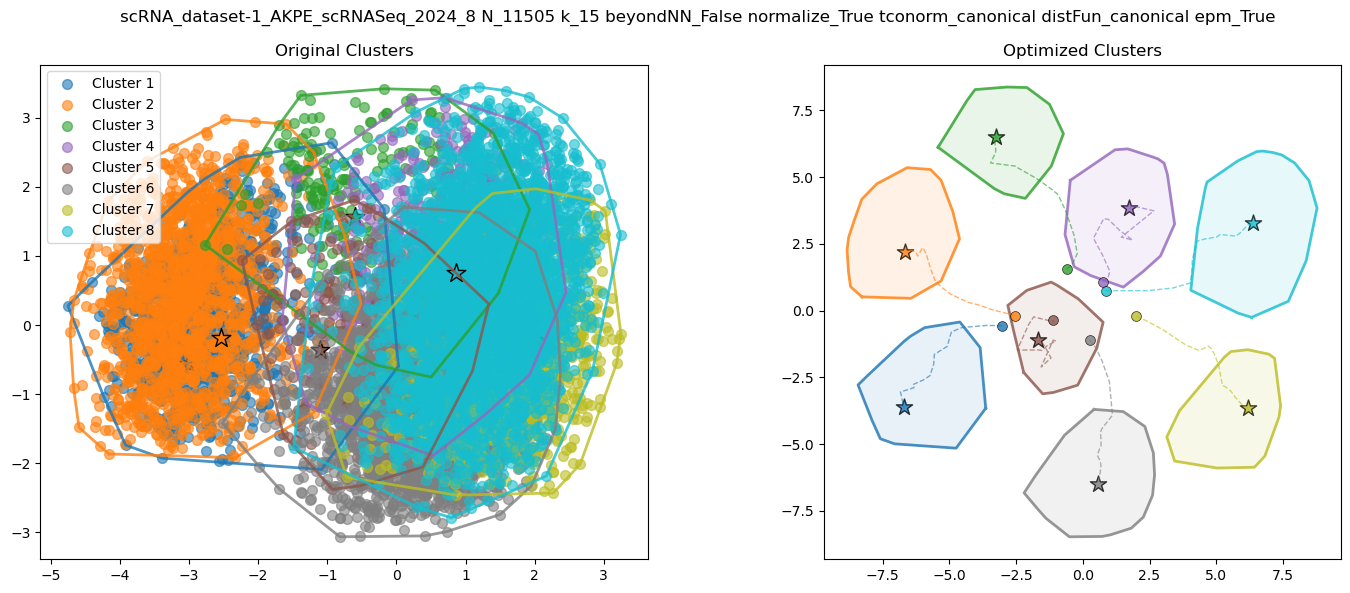

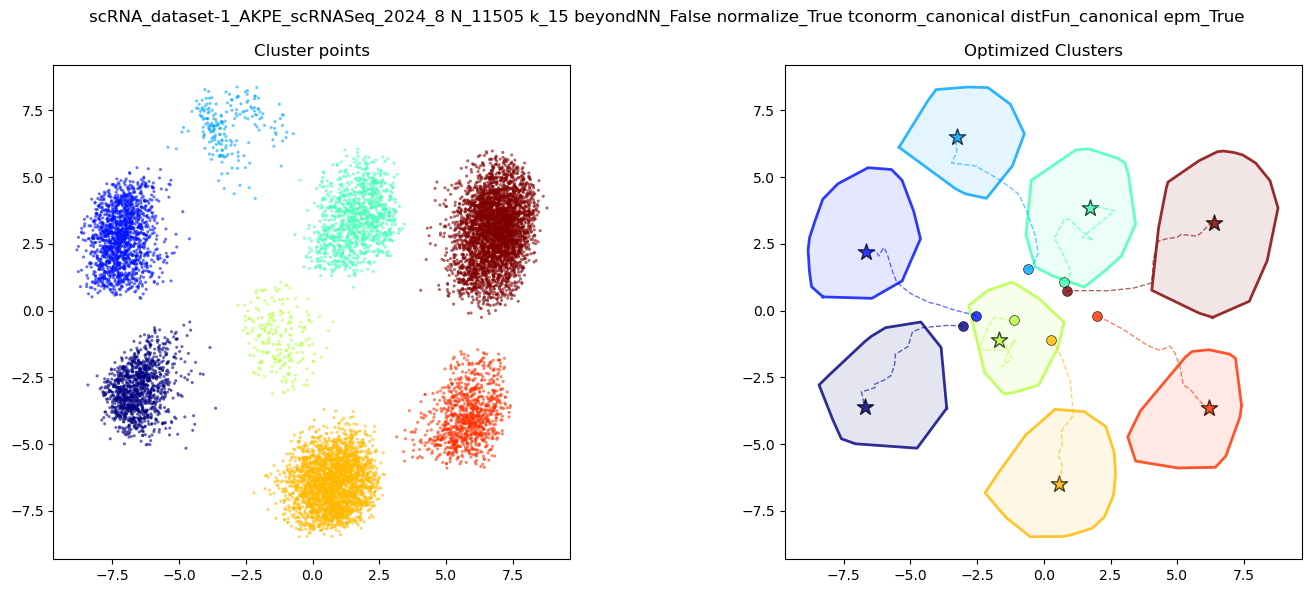

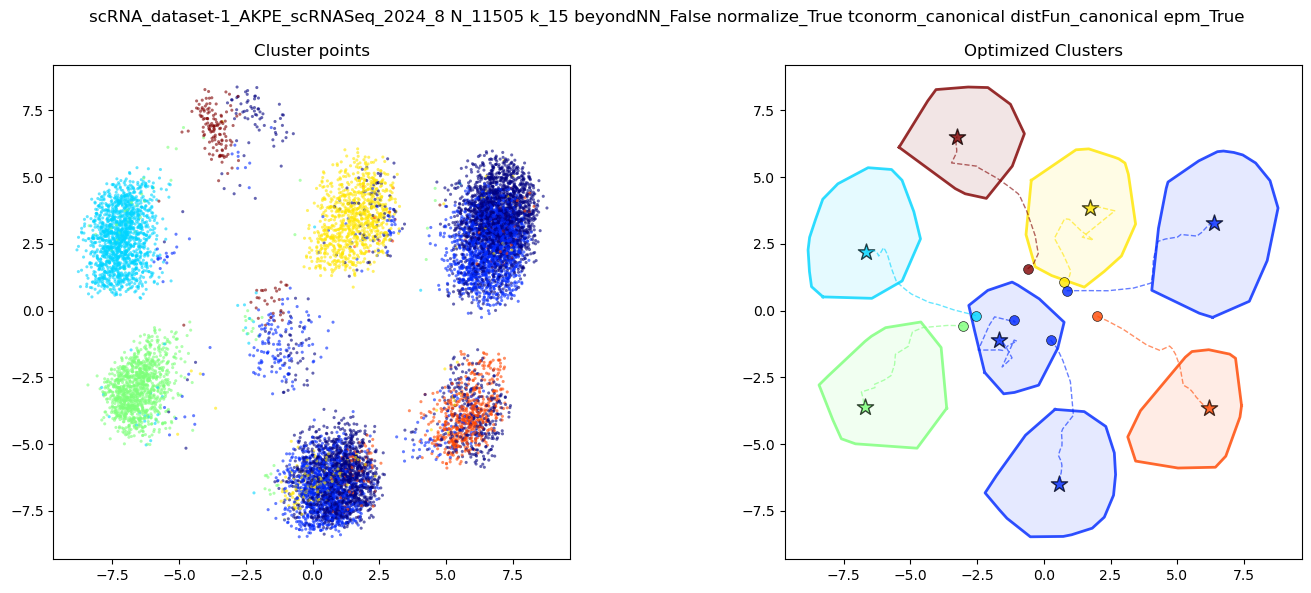

In [83]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters, enable_grid=False)

In [84]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = run_isumap_cluster(pca_data, smoc2_data, datasetName=datasetName+"_8_smoc2", cluster_algo=linkage_cluster, **kwargs)

Number of CPU threads =  128

Nearest neighbours computed in: 0.60 sec

Normalization computed in: 0.00 sec
Computing the graph...

Graph computation: 1.32 sec
Applying t-conorm...

T-conorm application: 9.11 sec

Running Dijkstra...

Dijkstra: 24.80 sec
Number of clusters:  8

Performing classical MDS...

classical MDS: 5.19 sec

Starting cluster separation optimization...
Optimizing separation for 8 clusters...
Total parameters: 24
Iteration 0, Loss: 81.255615
Iteration 10, Loss: 0.894929
Iteration 20, Loss: 0.028782
Iteration 30, Loss: 0.011069
Iteration 40, Loss: 0.006809
Iteration 50, Loss: 0.004107
Iteration 60, Loss: 0.002831
Iteration 70, Loss: 0.002124
Converged at iteration 76

Isumap total time: 111.05 sec


In [2]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = load_my_object("scRNA_dataset-1_AKPE_scRNASeq_2024_8_smoc2")

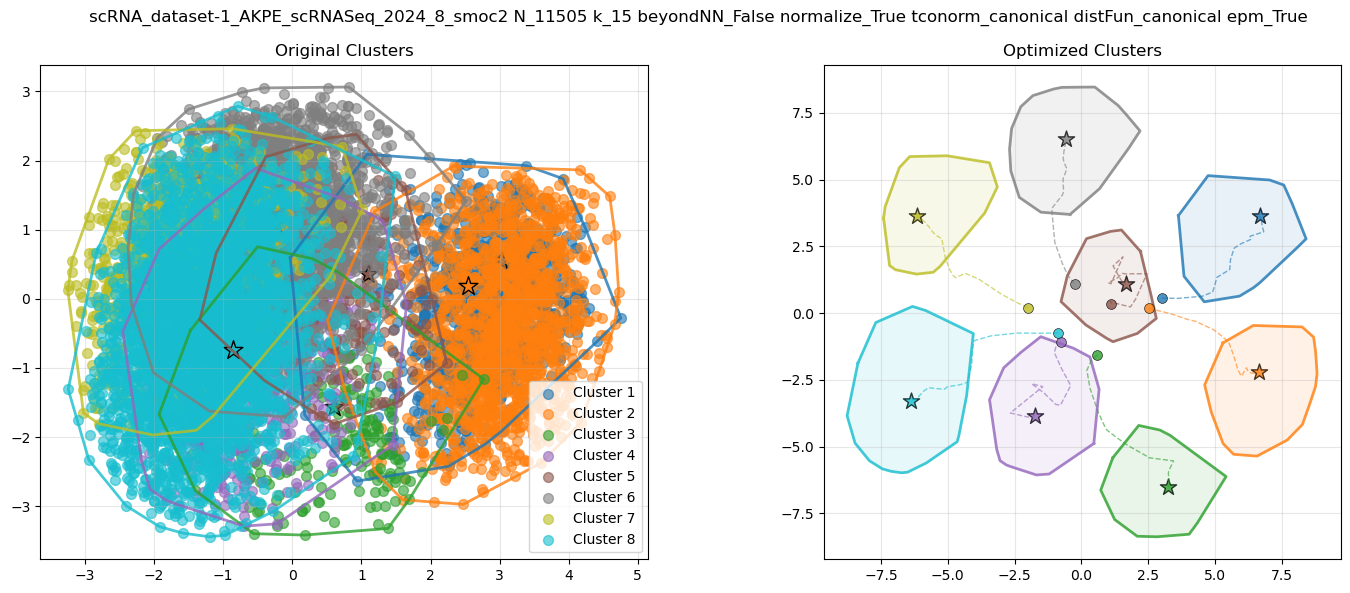

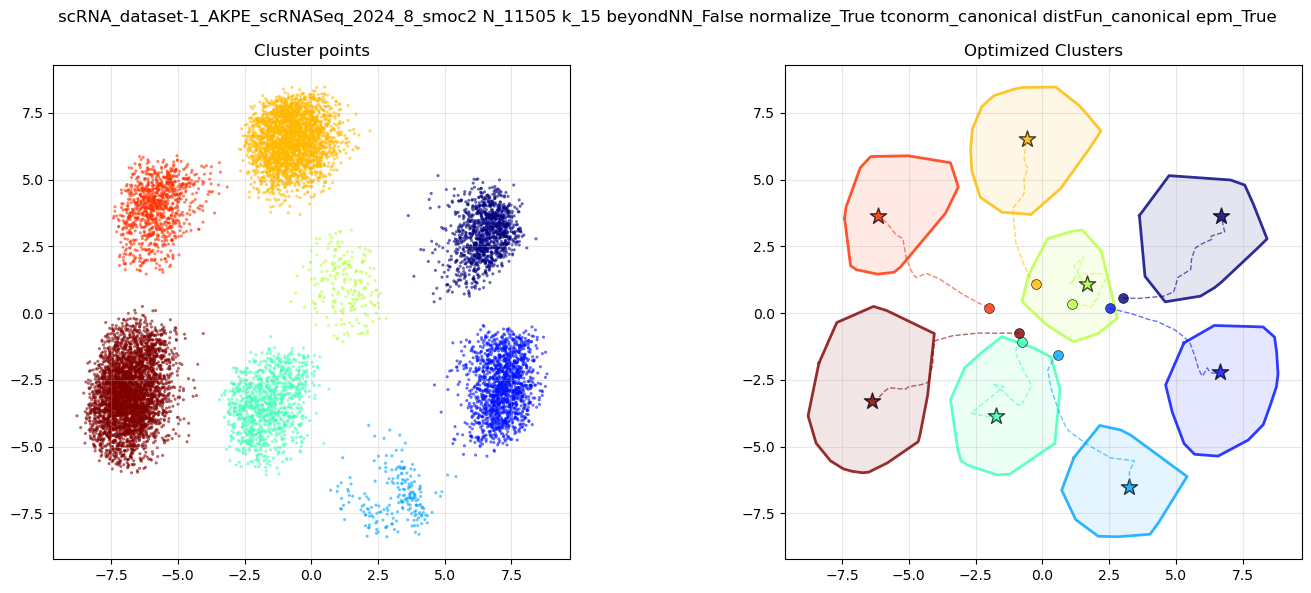

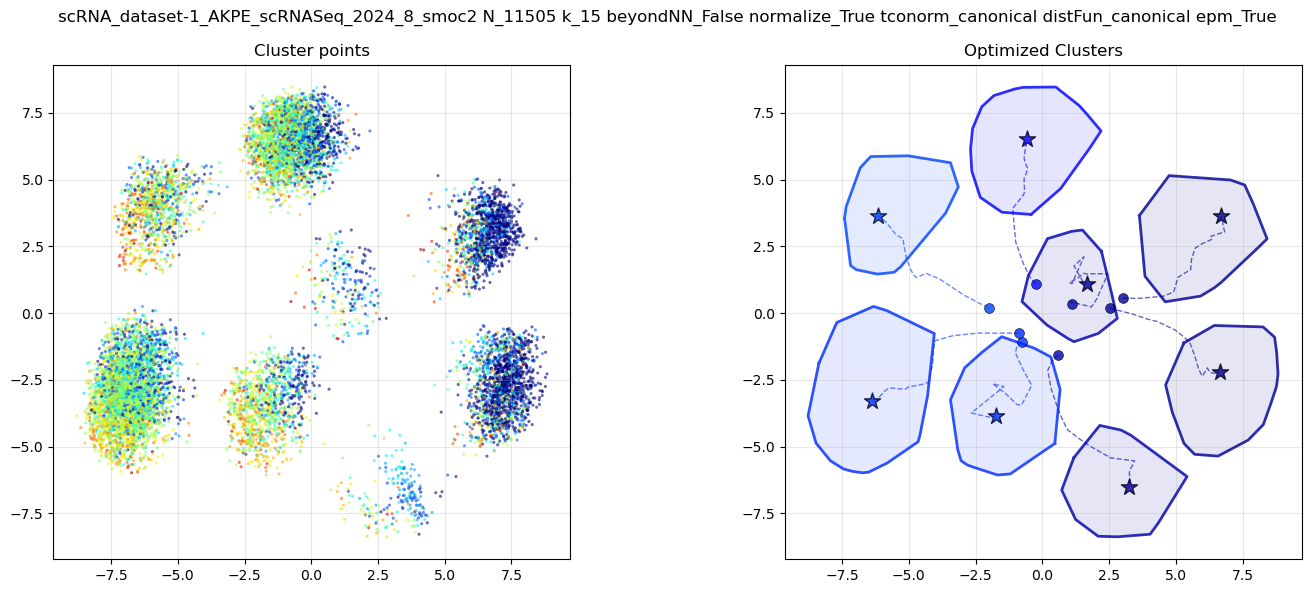

In [3]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters)

In [15]:
from umap import UMAP

In [17]:
%%time
embedding = UMAP().fit(pca_data)

CPU times: user 1min 51s, sys: 1min 1s, total: 2min 52s
Wall time: 32.9 s


In [18]:
AKPE_umapEmb = embedding.embedding_
save_object(AKPE_umapEmb, "AKPE_umapEmb.pkl")

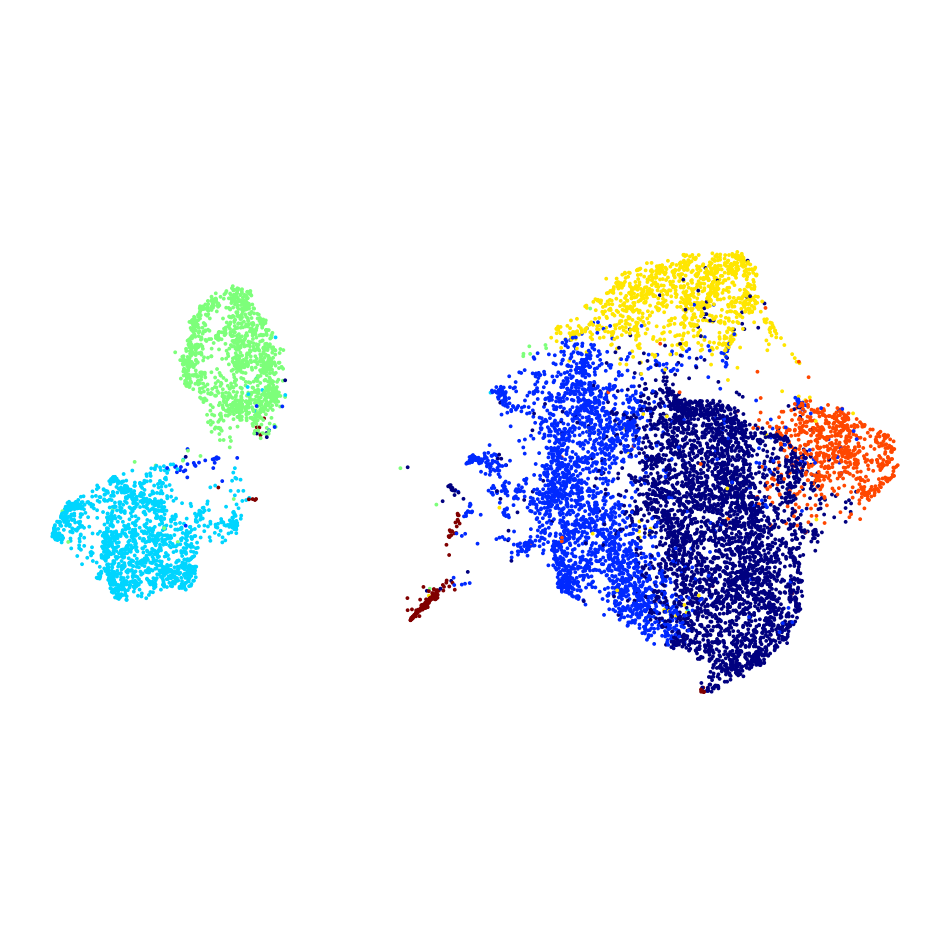

In [19]:
plot_data(AKPE_umapEmb, cluster_labels, title="", display=True, save=True, grid=False, axis=False)

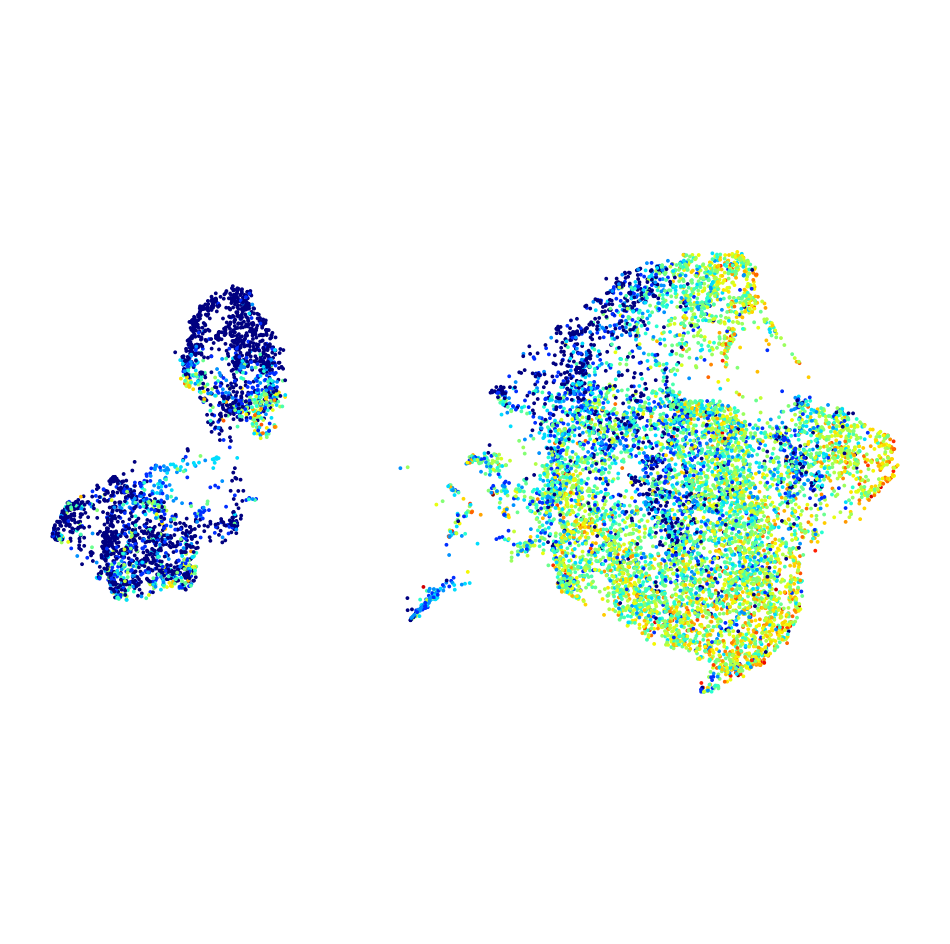

In [20]:
plot_data(AKPE_umapEmb, smoc2_data, title="", display=True, save=True, grid=False, axis=False, custom_color_map='hsv')

In [39]:
from sklearn.manifold import TSNE

In [40]:
tsne = TSNE(
    n_components=2,       # Initialize with MDS results
    random_state=42,
    perplexity=30,
    n_iter=1000
)

In [42]:
%%time
tsne_embedding = tsne.fit_transform(pca_data)

CPU times: user 38min 59s, sys: 1min 32s, total: 40min 32s
Wall time: 38.8 s


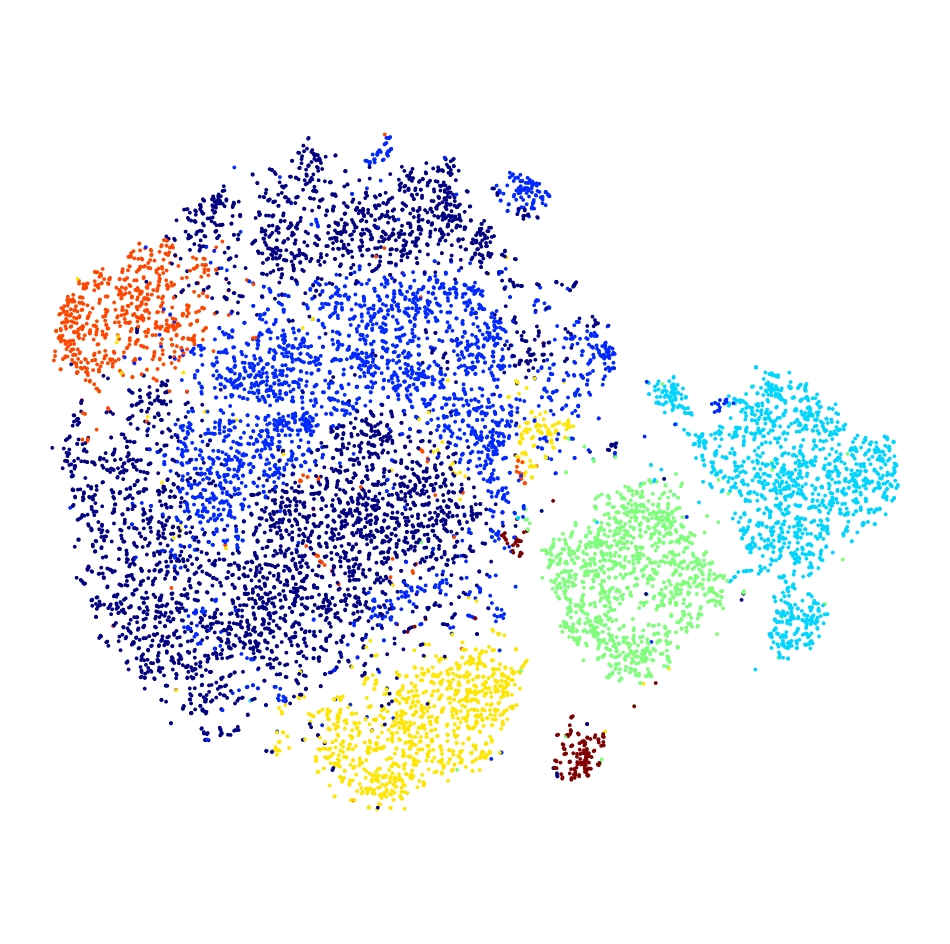

In [69]:
plot_data(tsne_embedding, cluster_labels, title="", display=True, save=True, grid=False, axis=False)

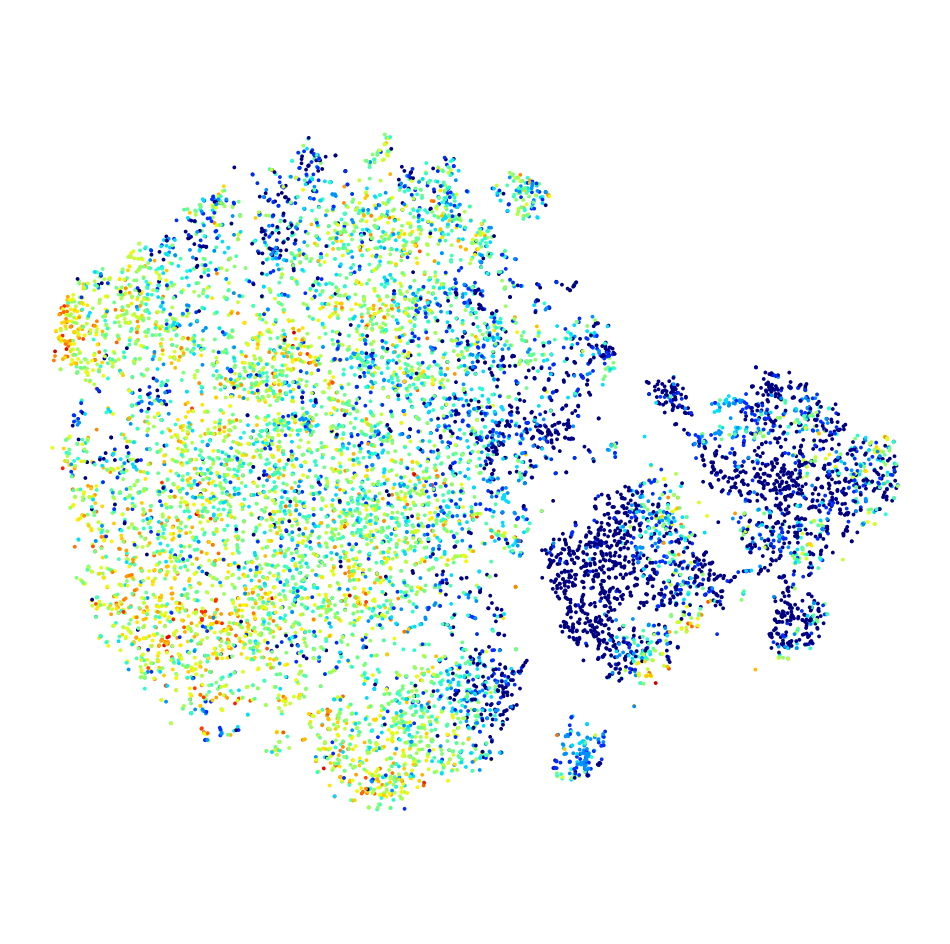

In [67]:
plot_data(tsne_embedding, smoc2_data, title="", display=True, save=True, grid=False, axis=False)